Fandango's Rating System: To analyze the more recent movie ratings data to determine if there has been any change in the Fandangos movie system which is assumed to be  previously biased.


In [1]:
import pandas as pd
fandango_score_comparison=pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17=pd.read_csv('movie_ratings_16_17.csv')
print(fandango_score_comparison)

                                               FILM  RottenTomatoes  \
0                    Avengers: Age of Ultron (2015)              74   
1                                 Cinderella (2015)              85   
2                                    Ant-Man (2015)              80   
3                            Do You Believe? (2015)              18   
4                     Hot Tub Time Machine 2 (2015)              14   
5                          The Water Diviner (2015)              63   
6                             Irrational Man (2015)              42   
7                                   Top Five (2014)              86   
8                      Shaun the Sheep Movie (2015)              99   
9                               Love & Mercy (2015)              89   
10                Far From The Madding Crowd (2015)              84   
11                                 Black Sea (2015)              82   
12                                 Leviathan (2014)              99   
13    

In [2]:
fandango_previous = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

Since samples are not random we can try working around a new goal to figure out if there are any changes in the ratings that were previously taken and the new ones.

In [3]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [4]:
sum(fandango_previous['Fandango_votes'] < 30)


0

In [5]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]


In [6]:
fandango_previous.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [7]:
fandango_previous['Year'].value_counts()


2015    129
2014     17
Name: Year, dtype: int64

In [8]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [9]:
fandango_after['year'].value_counts()


2016    191
2017     23
Name: year, dtype: int64

In [10]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

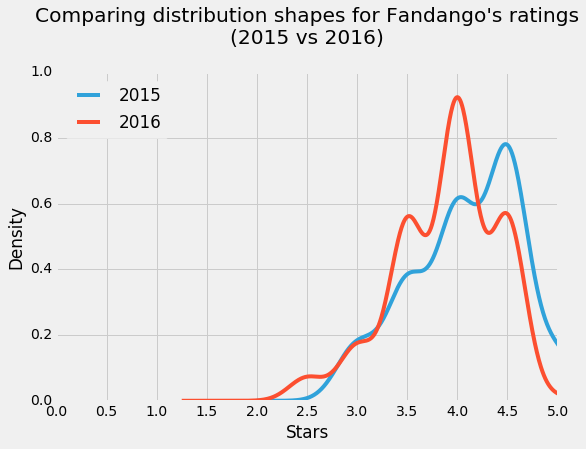

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.show()

Ratings were lower in 2016 as compared to 2015. This indicates change in ratings.


In [12]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [14]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000
